# Final Project

Bongalos, Joshua Benedict B.  |  Bachelor of Science in Computer Science

Student Performance Classification Using Knowledge-Based Rules and Naive Bayes.

This notebook explores student performance using **knowledge-based rules** and **Naive Bayes classifier**. It explore the dataset, analyze model performance, and visualize the confusion matrix.

In [9]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1.1 Dataset Exploration and Visualization
We explore the dataset using descriptive statistics and create graphs to understand data distribution.

In [10]:
# Dataset
df = pd.read_csv('student-mat.csv', sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [11]:
# Basic descriptive statistics
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [12]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

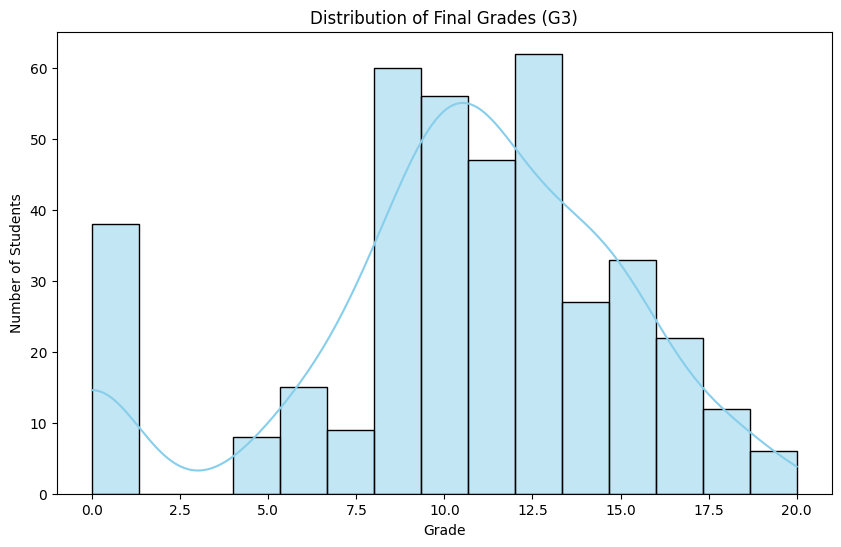

In [13]:
# Distribution of final grade (G3)
plt.figure(figsize=(10,6))
sns.histplot(df['G3'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.show()

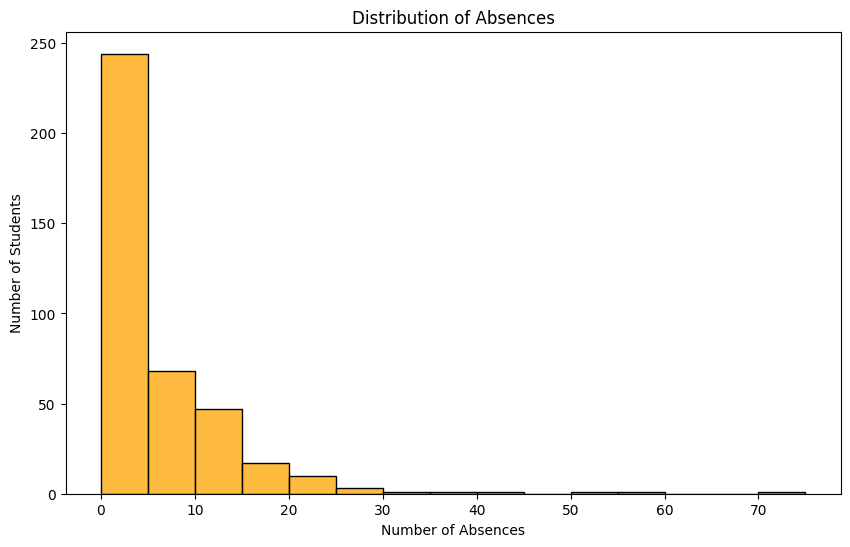

In [14]:
# Distribution of absences
plt.figure(figsize=(10,6))
sns.histplot(df['absences'], bins=15, color='orange')
plt.title('Distribution of Absences')
plt.xlabel('Number of Absences')
plt.ylabel('Number of Students')
plt.show()

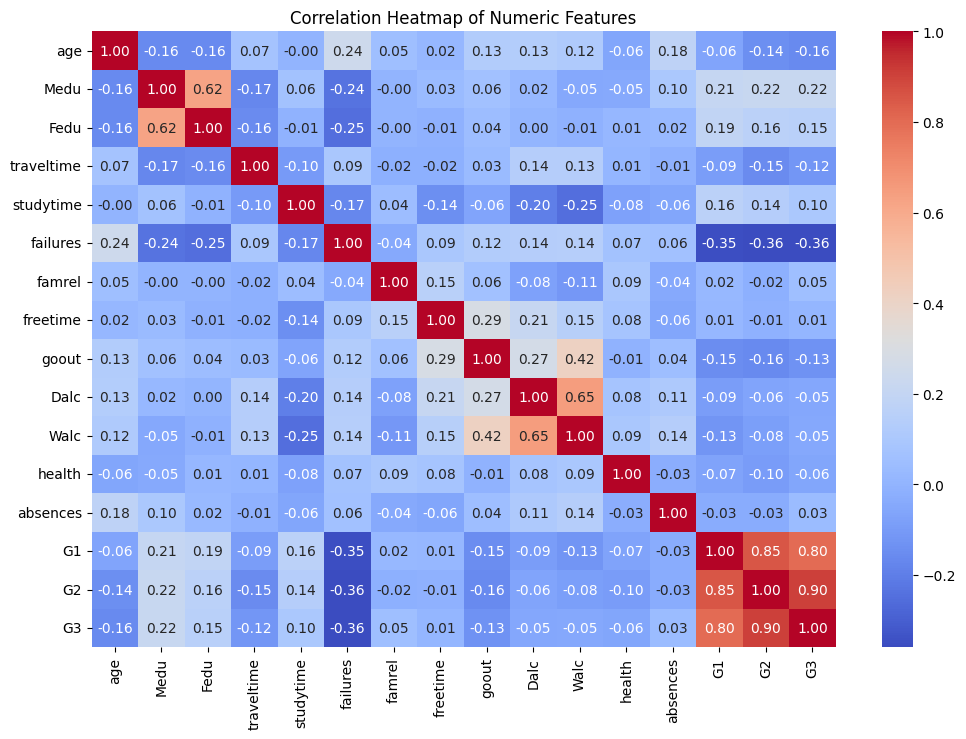

In [15]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# 1.2 Performance of Naive Bayes Algorithm
I create rule-based labels and train a Naive Bayes classifier. Accuracy will be computed from the testing set.

In [16]:
# Apply knowledge-based rules
df['G3'] = pd.to_numeric(df['G3'], errors='coerce')
df['absences'] = pd.to_numeric(df['absences'], errors='coerce')
df = df.dropna(subset=['G3'])

def apply_rules(row):
    g = row['G3']
    absn = row['absences']
    if g >= 16 and absn <= 5:
        return 'Excellent'
    elif g >= 13 and absn <= 10:
            return 'Good'
    elif g >= 10:
        return 'Average'
    else:
        return 'Poor'

df['rule_label'] = df.apply(apply_rules, axis=1)
df['rule_label'].value_counts()

rule_label
Average      149
Poor         130
Good          87
Excellent     29
Name: count, dtype: int64

In [23]:
# Features and labels for Naive Bayes
features = ['G3','absences','studytime'] if 'studytime' in df.columns else ['G3','absences']
X = df[features]
label_map = {'Poor':0,'Average':1,'Good':2,'Excellent':3}
y = df['rule_label'].map(label_map)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

# Accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print('Test Accuracy: {:.2f}%'.format(accuracy * 100)) 

print('Classification Report: ')
print(classification_report(y_test, y_pred, target_names=['Poor','Average','Good','Excellent']))

Test Accuracy: 90.76%
Classification Report: 
              precision    recall  f1-score   support

        Poor       0.97      0.77      0.86        39
     Average       0.83      0.96      0.89        45
        Good       0.96      1.00      0.98        26
   Excellent       1.00      1.00      1.00         9

    accuracy                           0.91       119
   macro avg       0.94      0.93      0.93       119
weighted avg       0.92      0.91      0.91       119



# Analysis
- The accuracy shown above comes from the testing set.

- The classification report includes precision, recall, and F1-score for each class.

- Higher accuracy indicates that the Naive Bayes classifier successfully predicts student performance categories based on the features."

# 1.3 Confusion Matrix Visualization
We visualize the confusion matrix to interpret classifier performance and see which classes are correctly or incorrectly predicted.

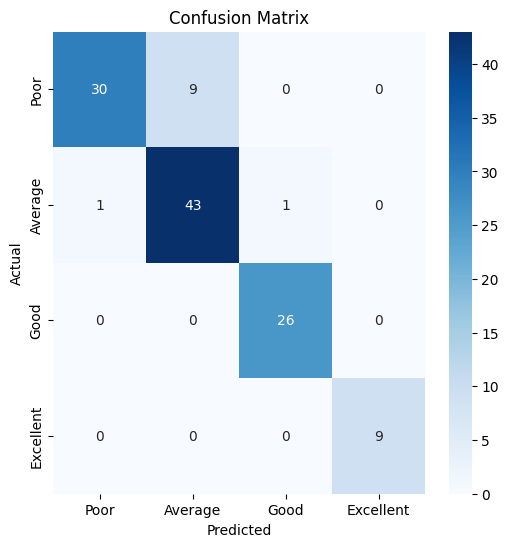

In [21]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Poor','Average','Good','Excellent'],
            yticklabels=['Poor','Average','Good','Excellent'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix Interpretation

- Diagonal values represent correctly predicted samples.

- Off-diagonal values represent misclassifications.

- For example, if some 'Good' students are predicted as 'Average', they appear off the diagonal.

- This visualization helps understand which performance categories are more likely to be confused and aids in model improvement.